In [118]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import glob
import os


In [119]:
train_image_path = glob.glob(r'./training_set/*/*.jpg')

In [120]:
len(train_image_path)

8000

In [121]:
train_image_path[:5]

['./training_set\\cat\\cat.1.jpg',
 './training_set\\cat\\cat.10.jpg',
 './training_set\\cat\\cat.100.jpg',
 './training_set\\cat\\cat.1000.jpg',
 './training_set\\cat\\cat.1001.jpg']

In [122]:
train_image_path[-5:]

['./training_set\\dog\\dog.995.jpg',
 './training_set\\dog\\dog.996.jpg',
 './training_set\\dog\\dog.997.jpg',
 './training_set\\dog\\dog.998.jpg',
 './training_set\\dog\\dog.999.jpg']

In [123]:
p = './training_set\\dog\\dog.995.jpg'
int(p.split('\\')[1] == 'cat')

0

In [124]:
#将猫设置为1，狗设置为0
train_image_label = [int(p.split('\\')[1] == 'cat') for p in train_image_path]

In [125]:
train_image_label[-5:]

[0, 0, 0, 0, 0]

In [126]:
def load_prepeocess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels= 3)
    image = tf.image.resize(image, [360, 360])
    image = tf.image.random_crop(image, [256, 256, 3]) #随机裁剪
    image = tf.image.random_flip_left_right(image) #随机左右翻转
    image = tf.image.random_flip_up_down(image) #随机上下翻转
    image = tf.image.random_brightness(image, 0.5) #随机亮度
    image = tf.image.random_contrast(image, 0, 1)
    image = tf.cast(image, tf.float32) #转码
    image = image / 255 #归一化
    label = tf.reshape(label, [1])
    return image, label

In [127]:
train_image_ds = tf.data.Dataset.from_tensor_slices((train_image_path, train_image_label))


In [128]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [129]:
train_image_ds = train_image_ds.map(load_prepeocess_image, num_parallel_calls= AUTOTUNE)


In [130]:
train_image_ds

<ParallelMapDataset shapes: ((256, 256, 3), (1,)), types: (tf.float32, tf.int32)>

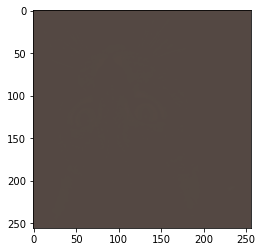

In [131]:
for img, laebl in train_image_ds.take(1):
    plt.imshow(img)

In [132]:
BATCH_SIZE = 32
train_count = len(train_image_path)

In [133]:
train_image_ds = train_image_ds.shuffle(train_count).batch(BATCH_SIZE)
train_image_ds = train_image_ds.prefetch(AUTOTUNE)

In [134]:
test_image_path = glob.glob(r'./test_set/*/*.jpg') 
test_image_label = [int(p.split('\\')[1] == 'cat') for p in test_image_path]
test_image_ds = tf.data.Dataset.from_tensor_slices((test_image_path, test_image_label))
test_image_ds = test_image_ds.map(load_prepeocess_image, num_parallel_calls= AUTOTUNE)
test_image_ds = test_image_ds.batch(BATCH_SIZE)
test_image_ds = test_image_ds.prefetch(AUTOTUNE)

In [135]:
test_image_path

['./test_set\\cats\\cat.4001.jpg',
 './test_set\\cats\\cat.4002.jpg',
 './test_set\\cats\\cat.4003.jpg',
 './test_set\\cats\\cat.4004.jpg',
 './test_set\\cats\\cat.4005.jpg',
 './test_set\\cats\\cat.4006.jpg',
 './test_set\\cats\\cat.4007.jpg',
 './test_set\\cats\\cat.4008.jpg',
 './test_set\\cats\\cat.4009.jpg',
 './test_set\\cats\\cat.4010.jpg',
 './test_set\\cats\\cat.4011.jpg',
 './test_set\\cats\\cat.4012.jpg',
 './test_set\\cats\\cat.4013.jpg',
 './test_set\\cats\\cat.4014.jpg',
 './test_set\\cats\\cat.4015.jpg',
 './test_set\\cats\\cat.4016.jpg',
 './test_set\\cats\\cat.4017.jpg',
 './test_set\\cats\\cat.4018.jpg',
 './test_set\\cats\\cat.4019.jpg',
 './test_set\\cats\\cat.4020.jpg',
 './test_set\\cats\\cat.4021.jpg',
 './test_set\\cats\\cat.4022.jpg',
 './test_set\\cats\\cat.4023.jpg',
 './test_set\\cats\\cat.4024.jpg',
 './test_set\\cats\\cat.4025.jpg',
 './test_set\\cats\\cat.4026.jpg',
 './test_set\\cats\\cat.4027.jpg',
 './test_set\\cats\\cat.4028.jpg',
 './test_set\\cats\\

In [136]:
imgs, labels = next(iter(train_image_ds))

In [137]:
imgs.shape

TensorShape([32, 256, 256, 3])

In [138]:
labels.shape

TensorShape([32, 1])

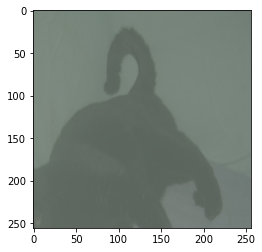

In [139]:
plt.imshow(imgs[0])

In [46]:
labels[0]

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([1])>

In [65]:
#创建模型
model = keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape = (256, 256, 3), activation= 'relu'),
    tf.keras.layers.Conv2D(64, (3, 3), input_shape = (256, 256, 3), activation= 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation= 'relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation= 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation= 'relu'),
    tf.keras.layers.Conv2D(256, (3, 3), activation= 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), activation= 'relu'),
    tf.keras.layers.Conv2D(512, (3, 3), activation= 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(1024, (3, 3), activation= 'relu'),
    tf.keras.layers.Conv2D(1024, (3, 3), activation= 'relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation= 'relu'),
    tf.keras.layers.Dense(1)
])

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 126, 126, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 64)      256       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 124, 124, 128)     73856     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 122, 122, 128)     147584    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 61, 61, 128)      

In [49]:
pred = model(imgs)
pred.shape

TensorShape([32, 1])

In [50]:
np.array([p[0].numpy() for p in tf.cast(pred > 0, tf.int32)]) 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [51]:
np.array([l.numpy() for l in labels])


array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]])

In [52]:
ls = tf.keras.losses.BinaryCrossentropy()
ls([0., 0. ,1. , 1.], [1., 1., 1., 1.])

<tf.Tensor: shape=(), dtype=float32, numpy=7.6666193>

In [53]:
tf.keras.losses.binary_crossentropy([0., 0. ,1. , 1.], [1., 1., 1., 1.])

<tf.Tensor: shape=(), dtype=float32, numpy=7.6666193>

In [54]:
optimizer = tf.keras.optimizers.Adam()

In [55]:
epoch_loss_avg = tf.keras.metrics.Mean('train_loss')
train_accuracy = tf.keras.metrics.Accuracy()
epoch_loss_avg_test = tf.keras.metrics.Mean('test_loss')
test_accuracy = tf.keras.metrics.Accuracy()

In [56]:
def train_step(model, images, labels):
    with tf.GradientTape() as t:
        pred = model(images)
        loss_step = tf.keras.losses.BinaryCrossentropy(from_logits= True)(labels, pred)
    grads = t.gradient(loss_step, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    epoch_loss_avg(loss_step)
    train_accuracy(labels, tf.cast(pred > 0, tf.int32))


In [57]:
def test_step(model, images, labels):
    pred = model(images, training = False)
    loss_step = tf.keras.losses.BinaryCrossentropy(from_logits= True)(labels, pred)
    epoch_loss_avg_test(loss_step)
    test_accuracy(labels, tf.cast(pred > 0, tf.int32))

In [58]:
train_loss_result = []
train_acc_result = []

test_loss_result = []
test_acc_result = []


In [59]:
num_epochs = 30

In [60]:
for epoch in range(num_epochs):
    for imgs_, labels_ in train_image_ds:
        train_step(model, imgs_, labels_)
        print('.', end = '')
    print()

    train_loss_result.append(epoch_loss_avg.result())
    train_acc_result.append(train_accuracy.result())

    for imgs_, labels_ in test_image_ds:
        test_step(model, imgs_, labels_)
    test_loss_result.append(epoch_loss_avg_test.result())
    test_acc_result.append(test_accuracy.result())


    print('Epoch: {}:loss: {: .3f}, accuracy: {:.3f}, test_loss:{:.3f}, test_accuracy:{:.3f}'.format(
        epoch + 1, 
        epoch_loss_avg.result(),
        train_accuracy.result(),
        epoch_loss_avg_test.result(),
        test_accuracy.result()
    ))
    epoch_loss_avg.reset_states()
    train_accuracy.reset_states()
    epoch_loss_avg_test.reset_states()
    test_accuracy.reset_states()


..........................................................................................................................................................................................................................................................
Epoch: 1:loss:  0.694, accuracy: 0.497, test_loss:0.690, test_accuracy:1.000
..........................................................................................................................................................................................................................................................
Epoch: 2:loss:  0.687, accuracy: 0.540, test_loss:0.705, test_accuracy:0.310
................

KeyboardInterrupt: 